## monte carlo playtime

In [9]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [10]:
#just estimating an integral over some range by evaluating ntegrand at random points, finding the average, and multiplying by the range to get approximate area under the curve.

def randomgen(lb, ub):
    return np.random.uniform(lb,ub)


def fx_ave(samps,lb,ub):
    fx = [0]*samps
    for i in range(samps):
        p = randomgen(lb,ub)
        fx[i-1] = (np.exp(-p))/(1+((p-1)**2))
    fx = np.array(fx)
    return np.mean(fx)*(ub-lb)


def fx2_ave(samps,lb,ub):
    fx2 = [0]*samps
    for i in range(samps):
        p = randomgen(lb,ub)
        fx2[i-1] = ((np.exp(-p))/(1+((p-1)**2)))**2
    fx2 = np.array(fx2)
    return np.mean(fx2)*(ub-lb)   

In [11]:
I = fx_ave(10000,0,5)
I2 = fx2_ave(10000,0,5)

print(I, I2)

0.7019185488033218 0.27312291253460635


In [12]:
var = I**2 - I2
print(var**2)

0.04820955182976101


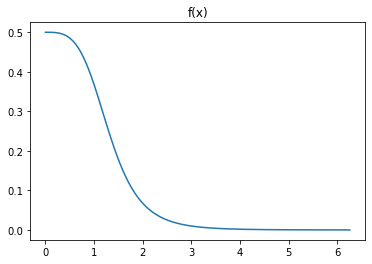

In [15]:
def f_of_x(x):
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return (np.exp(-1*x))/(1+(x-1)**2)

xs = [float(i/50) for i in range(int(50*np.pi*2))]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

In [17]:
#so this function is """Active""" from like 0-3 and then doesnt do much after that. so let's pick hella points in that range.

def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

# this is the template of our weight function g(x)
def g_of_x(x, A, lamda):
    e = 2.71828
    return A*math.pow(e, -1*lamda*x)

def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

def get_IS_variance(lamda, num_samples):
    """
    This function calculates the variance if a Monte Carlo
    using importance sampling.
    Args:
    - lamda (float) : lamdba value of g(x) being tested
    Return: 
    - Variance
    """
    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave

# get variance as a function of lambda by testing many
# different lambdas

test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    clear_output(wait=True)
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

Optimal Lambda: 1.6500000000000001
Optimal Variance: 0.03975869272890664
Error: 0.0019939581923627847


In [18]:

def importance_sampling_MC(lamda, num_samples):
    A = lamda
    
    running_total = 0
    for i in range(num_samples):
        r = get_rand_number(0,1)
        running_total += f_of_x(inverse_G_of_r(r, lamda=lamda))/g_of_x(inverse_G_of_r(r, lamda=lamda), A, lamda)
    approximation = float(running_total/num_samples)
    return approximation

# run simulation
num_samples = 10000
approx = importance_sampling_MC(optimal_lamda, num_samples)
variance = get_IS_variance(optimal_lamda, num_samples)
error = (variance/num_samples)**0.5

# display results
print(f"Importance Sampling Approximation: {approx}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Importance Sampling Approximation: 0.6922435912381425
Variance: 0.0521821746874187
Error: 0.0022843418020825758


**ok, now i'm gonna try to do the hydrogen atom.**

Alpha:  0 <E>:  -2.8574768380700926 VarE:  0.24162226621211502 ratio =  0.36632399999999216
Alpha:  0.05 <E>:  -2.8737771135277472 VarE:  0.17615413064947738 ratio =  0.37530499999999134
Alpha:  0.1 <E>:  -2.8794774197476594 VarE:  0.1368122503196414 ratio =  0.38163299999999056
Alpha:  0.15000000000000002 <E>:  -2.8764072380090453 VarE:  0.1116863680867759 ratio =  0.38689199999998997
Alpha:  0.2 <E>:  -2.874766230104869 VarE:  0.09714535982988082 ratio =  0.3903699999999895
Alpha:  0.25 <E>:  -2.8736626544566968 VarE:  0.08847637487881421 ratio =  0.39435999999998933


Text(0, 0.5, 'Energy')

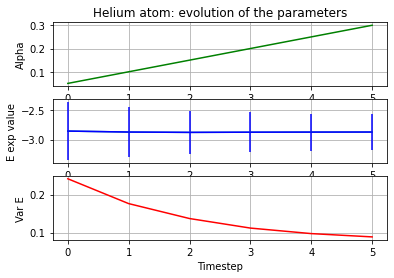

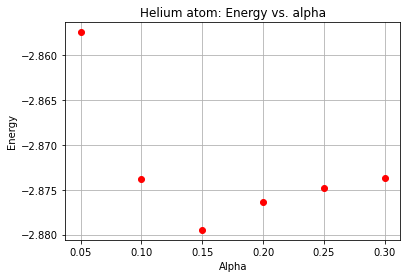

In [7]:
"""
                                HELIUM
                    Joana Fraxanet and Carlos Mateos
"""

import numpy as np
import matplotlib.pyplot as plt


#Define trial function
def wf(r1,r2,alpha):
    '''Computes the trial wavefunction'''
    norm_r1 = np.linalg.norm(r1)
    norm_r2 = np.linalg.norm(r2)
    r12 = np.linalg.norm(r1-r2)
    wf = np.exp(-2*norm_r1)*np.exp(-2*norm_r2)*np.exp(r12/(2*(1+alpha*r12)))
    return wf

#define prob density
def prob_density(r1,r2,alpha):
    '''Computes the probability density (not normalized) of the trial wavefunction'''
    return wf(r1,r2,alpha)**2

#define E local
def E_local(r1,r2,alpha):
    '''Computes the local energy, in terms of r1, r2 and alpha, corresponding to the trial wavefunction'''
    norm_r1 = np.linalg.norm(r1)
    norm_r2 = np.linalg.norm(r2)
    r12 = np.linalg.norm(r1-r2)        
    dot_product = np.dot(r1/norm_r1-r2/norm_r2,r1-r2)
    energy = -4+dot_product/(r12*(1+alpha*r12)**2)-1/(r12*(1+alpha*r12)**3)-1/(4*(1+alpha*r12)**4)+1/r12 
    return energy
   
def metropolis(N, alpha):
    '''Metropolis algorithm that takes N steps. We start with two random variable within the
    typical length of the problem and then we create a Markov chain taking into account the 
    probability density. At each step we compute the parameters we are interested in.'''
        
    L = 1
    r1 = np.random.rand(3)*2*L-L
    r2 = np.random.rand(3)*2*L-L #random number from -L to L
    E = 0
    E2 = 0
    Eln_average = 0
    ln_average = 0
    rejection_ratio = 0
    step = 0
    max_steps = 500
    
    #Algorithm
    for i in range(N):
        chose = np.random.rand()
        step = step + 1
        if chose < 0.5:
            r1_trial = r1 + 0.5*(np.random.rand(3)*2*L-L)
            r2_trial = r2
        else:
            r2_trial = r2 + 0.5*(np.random.rand(3)*2*L-L)
            r1_trial = r1
        if prob_density(r1_trial,r2_trial,alpha) >= prob_density(r1,r2,alpha):
            r1 = r1_trial
            r2 = r2_trial
        else:
            dummy = np.random.rand()
            if dummy < prob_density(r1_trial,r2_trial,alpha)/prob_density(r1,r2,alpha):
                r1 = r1_trial
                r2 = r2_trial
            else:
                rejection_ratio += 1./N
                
        if step > max_steps:
            E += E_local(r1,r2,alpha)/(N-max_steps)
            E2 += E_local(r1,r2,alpha)**2/(N-max_steps)
            r12 = np.linalg.norm(r1-r2)
            Eln_average += (E_local(r1,r2,alpha)*-r12**2/(2*(1+alpha*r12)**2))/(N-max_steps)
            ln_average += -r12**2/(2*(1+alpha*r12)**2)/(N-max_steps)
    
    return E, E2, Eln_average, ln_average, rejection_ratio

'''Initial parameters'''
alpha = 0
#alpha_iterations = 30
alpha_iterations = 6
N_metropolis = 5000
random_walkers = 200
gamma = 0.5

energy_plot = np.array([])
alpha_plot = np.array([])
variance_plot = np.array([])

for i in range(alpha_iterations):
    E = 0
    E2 = 0
    dE_dalpha = 0
    Eln = 0
    ln = 0
    rejection_ratio = 0
    
    for j in range(random_walkers): #We use more than one random_walkers in case one gets stuck at some X
        E_met, E2_met, Eln_met, ln_met, rejections_met = metropolis(N_metropolis, alpha)
        E += E_met/random_walkers
        E2 += E2_met/random_walkers
        Eln += Eln_met/random_walkers
        ln += ln_met/random_walkers
        rejection_ratio += rejections_met/random_walkers 

    '''Define next alpha'''
    dE_dalpha = 2*(Eln-E*ln)
    print('Alpha: ', alpha, '<E>: ', E, 'VarE: ', E2-E**2, 'ratio = ', rejection_ratio)
    alpha = alpha + 0.05
    #alpha = alpha - gamma*dE_dalpha

    '''Plot'''    
    energy_plot = np.append(energy_plot, E)
    alpha_plot = np.append(alpha_plot, alpha)
    variance_plot = np.append(variance_plot, E2-E**2)


fig1 = plt.figure()

ax1 = fig1.add_subplot(311)
plt.title('Helium atom: evolution of the parameters')
plt.grid()
ax1.plot(alpha_plot, 'g')
ax1.set_xlabel('Timestep')
ax1.set_ylabel('Alpha')

ax2 = fig1.add_subplot(312)
plt.grid()
ax2.plot(energy_plot)
ax2.set_xlabel('Timestep')
ax2.set_ylabel('E exp value')
ax2.errorbar(range(len(energy_plot)), energy_plot, yerr=np.sqrt(variance_plot), c='b')

ax3 = fig1.add_subplot(313)
plt.grid()
ax3.plot(variance_plot, 'r')
ax3.set_xlabel('Timestep')
ax3.set_ylabel('Var E')

fig2 = plt.figure()
ax4 = fig2.add_subplot(111)
plt.title('Helium atom: Energy vs. alpha')
plt.grid()
ax4.plot(alpha_plot, energy_plot, 'ro')
ax4.set_xlabel('Alpha')
ax4.set_ylabel('Energy')